In [2]:
import pandas as pd
import numpy as np

In [3]:
data = np.random.randn(4,3) # normal dağılıma sahip 4x3'lük bir numpy matris oluşturur...

> Data Frame dediğimiz kavram, bizlere bir veri çerçevesi oluşturur. Bu veri çerçevesi dediğimiz şey temel bir excel tablosu gibi düşünebiliriz.

In [4]:
dataFrame = pd.DataFrame(data) # dataframe çerçevesini dataFrame değişkenine atadım.

In [5]:
dataFrame # görüntüledim

,0,1,2
0,-3.050544,0.886662,1.941003
1,0.276350,-1.233871,1.519711
2,0.142419,1.070014,0.847835
3,-0.694888,-1.299716,-1.015089


In [6]:
dataFrame[0] # 0. sütunu seçmene olanak sağlar

0   -3.050544
1    0.276350
2    0.142419
3   -0.694888
Name: 0, dtype: float64

> Data Frame dediğimiz kavram temelinde bir pandas serisidir. Tek farklı bu serileri yan yana getirtir bir tablo gibi gösterim sağlar...

In [7]:
type(dataFrame[0]) # series türü olduğunu görüntüledik

pandas.core.series.Series

* Peki dataframelerde indeksleri değiştirebilir miyiz ?

> Ayrıca data framelerde iki adet index vardır biri satır indexidir. diğeri sütun indexidir.

In [8]:
yeniDataFrame = pd.DataFrame(data, index = ["Ahmet","Ali","Ayşe","Melike"], columns = ["Maaş", "Yaş","Çalışma Saatleri"])

* İndexte bizim satır isimlerimizi değiştirdik.
* columns'ta ise bizim sütun bilgilerini değiştirdik.

Veriyi aslında daha anlaşılabilir bir şekilde görselleştirmiş olduk...

In [9]:
yeniDataFrame

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ali,0.276350,-1.233871,1.519711
Ayşe,0.142419,1.070014,0.847835
Melike,-0.694888,-1.299716,-1.015089


In [10]:
yeniDataFrame["Yaş"] # dataframe içerisinden istenilen sütun bilgilerini seçmemize olanak sağlar ve sonucunda pandas serisi döndürür...

Ahmet     0.886662
Ali      -1.233871
Ayşe      1.070014
Melike   -1.299716
Name: Yaş, dtype: float64

In [11]:
yeniDataFrame["Çalışma Saatleri"] # çalışma saatleri sütununu bana seçer ve pandas serisi olarak döndürür.

Ahmet     1.941003
Ali       1.519711
Ayşe      0.847835
Melike   -1.015089
Name: Çalışma Saatleri, dtype: float64

In [12]:
yeniDataFrame[["Maaş", "Yaş"]] # iki farklı sütunu aynı anda seçebiliyorum

,Maaş,Yaş
Ahmet,-3.050544,0.886662
Ali,0.276350,-1.233871
Ayşe,0.142419,1.070014
Melike,-0.694888,-1.299716


In [13]:
yeniDataFrame

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ali,0.276350,-1.233871,1.519711
Ayşe,0.142419,1.070014,0.847835
Melike,-0.694888,-1.299716,-1.015089


> Biz bu zamana kadar sürekli olarak sütunları seçtik.

* Peki biz satırları seçebilir miyiz

> Evet Seçebiliriz bunu ise loc kullanarak yapabiliriz.

```pythonyeniDataFrame["Ahmet"]
ek


> Eğer bu kodu bu şekilde çalıştırırsak hata alırız çünkü bu kod direkt olarak sütunlar arasında araştırma yapmamıza olanak sağlar. 

In [14]:
yeniDataFrame.loc["Ahmet"] # bu şekilde ahmet satırında bulunan bütün verileri bana bir pandas serisi olarak döndürür

Maaş               -3.050544
Yaş                 0.886662
Çalışma Saatleri    1.941003
Name: Ahmet, dtype: float64

In [15]:
yeniDataFrame.loc["Melike"] # melike satırındaki bütün değerleri bana getirir.

Maaş               -0.694888
Yaş                -1.299716
Çalışma Saatleri   -1.015089
Name: Melike, dtype: float64

In [16]:
# aynı zamanda index bazlı da loc değerini kullanabiliriz. Mesela
yeniDataFrame.iloc[0] # 0. indexte olan değerin verilerini bana getirir yani Ahmet'in verileri

Maaş               -3.050544
Yaş                 0.886662
Çalışma Saatleri    1.941003
Name: Ahmet, dtype: float64

In [18]:
yeniDataFrame["Maaş"]

Ahmet    -3.050544
Ali       0.276350
Ayşe      0.142419
Melike   -0.694888
Name: Maaş, dtype: float64

> Bazen oluşturduğumuz dataframelere yeni bir kolon ekleyebiliriz. Bu kolonu aşağıdaki gibi ekledik.

* Burada yaptığımız işlem emeklilik yaşı diye bir sütun oluşturup bunun içerisinde toplama gerçekleştirdik.

In [39]:
yeniDataFrame["Emeklilik Yaşı"] = yeniDataFrame["Yaş"] + yeniDataFrame["Yaş"] # yeniDataFrame'e yeni bir kolon eklemiş oluruz...

In [40]:
yeniDataFrame # görüldüğü gibi yeni sütun eklendi

,Maaş,Yaş,Çalışma Saatleri,Emeklilik Yaşı
Ahmet,-3.050544,0.886662,1.941003,1.773325
Ali,0.276350,-1.233871,1.519711,-2.467741
Ayşe,0.142419,1.070014,0.847835,2.140028
Melike,-0.694888,-1.299716,-1.015089,-2.599432


> Peki var olan bir dataframeden sütun veya satırları düşürmek mümkün müdür?

* Evet mümkündür. İstenilmeyen satırları drop methodunu kullanarak düşürebiliriz. 
* Ama drop methodunu kullanırken axis diye bir çağrı yapmazsak kod çalışırken hata verecektir...
* axis'e = 1 verirsek bizim sütunumuzu yani 'Emeklilik Yaşı','Maaş','Yaş','Çalışma Saatleri' gibi sütunlardan istenileni dataframeden silecektir.
* axis'e = 0 verirsek bizim satırımızı yani 'Ahmet','Ali','Ayşe','Melike' gibi satırlardan birini dataframeden silecektir. (axis varsayılan değeri sıfırdır...)

In [41]:
yeniDataFrame.drop("Emeklilik Yaşı", axis = 1) # Emeklilik yaşı sütununu dataframeden sildi...

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ali,0.276350,-1.233871,1.519711
Ayşe,0.142419,1.070014,0.847835
Melike,-0.694888,-1.299716,-1.015089


In [42]:
yeniDataFrame.drop("Melike", axis = 0) # axis'i belirtmene gerek yok çünkü varsayılan değer sıfırdır ama 
# yine de sıfır yazarsak melike satırını dataframeden sildi....

,Maaş,Yaş,Çalışma Saatleri,Emeklilik Yaşı
Ahmet,-3.050544,0.886662,1.941003,1.773325
Ali,0.276350,-1.233871,1.519711,-2.467741
Ayşe,0.142419,1.070014,0.847835,2.140028


In [43]:
yeniDataFrame # herhangi bir değişiklik olmadı ? Neden ?

,Maaş,Yaş,Çalışma Saatleri,Emeklilik Yaşı
Ahmet,-3.050544,0.886662,1.941003,1.773325
Ali,0.276350,-1.233871,1.519711,-2.467741
Ayşe,0.142419,1.070014,0.847835,2.140028
Melike,-0.694888,-1.299716,-1.015089,-2.599432


> Bu şekilde drop kullanımı dataframe'de değişikliğe sebep olmaz çünkü bu değişikliği dataframe'e bildirmediğimizi gösterir.
* Bunu önlemek istiyorsak inplace diye bir özelliği drop'un içerisine eklememiz gerekir.
* drop içerisinde yazılan inplace özelliği boolean değer döndürür yani true veya false değer döndürür...

In [44]:
yeniDataFrame.drop("Emeklilik Yaşı", axis = 1, inplace=True) # inplace özelliğini kullanarak değişikliği dataframe ile eşitlemiş olduk....

In [45]:
yeniDataFrame

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ali,0.276350,-1.233871,1.519711
Ayşe,0.142419,1.070014,0.847835
Melike,-0.694888,-1.299716,-1.015089


> Satırlar içerisinden bir değeri göstermemiz gerektiğini veya listelemek gibi bir durum olduğunda nasıl bir yol izlemeliyiz ?
* Örneğin Ayşe'nin yaşını göstermek istediğimizde nasıl listeleriz ?

In [47]:
yeniDataFrame.loc["Ayşe"]["Yaş"] # Ayşenin yaşını bana getirir

1.0700139538453235

In [49]:
yeniDataFrame.loc["Ayşe", "Yaş"] # yukarıdaki kodla aynı işlemi yapar iki kullanımda söz konusu olabilir

1.0700139538453235

> Burada gerekli sayısal işaretlere göre verilerini görüntülememiz de mümkündür. 

In [50]:
yeniDataFrame < 0

,Maaş,Yaş,Çalışma Saatleri
Ahmet,True,False,False
Ali,False,True,False
Ayşe,False,False,False
Melike,True,True,True


> farklı gösterimlerle de gösterim sağlayabiliriz...

In [51]:
booleanFrame = yeniDataFrame < 0 

In [52]:
booleanFrame

,Maaş,Yaş,Çalışma Saatleri
Ahmet,True,False,False
Ali,False,True,False
Ayşe,False,False,False
Melike,True,True,True


In [53]:
yeniDataFrame

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ali,0.276350,-1.233871,1.519711
Ayşe,0.142419,1.070014,0.847835
Melike,-0.694888,-1.299716,-1.015089


In [55]:
yeniDataFrame[booleanFrame] # sıfırdan küçük değerleri gösterir diğerleri null olarak gösterim sağladığını söyleyebiliriz.

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,NaN,NaN
Ali,NaN,-1.233871,NaN
Ayşe,NaN,NaN,NaN
Melike,-0.694888,-1.299716,-1.015089


In [57]:
yeniDataFrame[yeniDataFrame < 0 ] # bu da değişken tanımlamadan da yapmak mümkündür

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,NaN,NaN
Ali,NaN,-1.233871,NaN
Ayşe,NaN,NaN,NaN
Melike,-0.694888,-1.299716,-1.015089


In [60]:
yeniDataFrame[yeniDataFrame["Yaş"] > 0] # Yaş değişkeni içerisinde sıfırdan büyük olanları listeler olmayan verileri satırdan siler

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ayşe,0.142419,1.070014,0.847835


#### Index Değiştirme

In [62]:
yeniDataFrame.reset_index() # indexleri siler 

,index,Maaş,Yaş,Çalışma Saatleri
0,Ahmet,-3.050544,0.886662,1.941003
1,Ali,0.276350,-1.233871,1.519711
2,Ayşe,0.142419,1.070014,0.847835
3,Melike,-0.694888,-1.299716,-1.015089


In [64]:
yeniDataFrame # inplace'i kullanmadığımız için değişiklik dataframe'e gönderilmedi

,Maaş,Yaş,Çalışma Saatleri
Ahmet,-3.050544,0.886662,1.941003
Ali,0.276350,-1.233871,1.519711
Ayşe,0.142419,1.070014,0.847835
Melike,-0.694888,-1.299716,-1.015089


In [65]:
yeniIndexListesi = ["Ahm","Al","Ayş","Mel"]

In [69]:
yeniDataFrame["Yeni Index"] = yeniIndexListesi # sütun olarak ekledim...

In [70]:
yeniDataFrame

,Maaş,Yaş,Çalışma Saatleri,Yeni Index
Ahmet,-3.050544,0.886662,1.941003,Ahm
Ali,0.276350,-1.233871,1.519711,Al
Ayşe,0.142419,1.070014,0.847835,Ayş
Melike,-0.694888,-1.299716,-1.015089,Mel


In [71]:
yeniDataFrame.set_index("Yeni Index") # sütunu indexe çektim yani indeksi değiştirdi

,Maaş,Yaş,Çalışma Saatleri
Yeni Index,,,
Ahm,-3.050544,0.886662,1.941003
Al,0.276350,-1.233871,1.519711
Ayş,0.142419,1.070014,0.847835
Mel,-0.694888,-1.299716,-1.015089


In [73]:
yeniDataFrame # inplace kullanmadığımız için dataframe'e değişikliği göndermedik

,Maaş,Yaş,Çalışma Saatleri,Yeni Index
Ahmet,-3.050544,0.886662,1.941003,Ahm
Ali,0.276350,-1.233871,1.519711,Al
Ayşe,0.142419,1.070014,0.847835,Ayş
Melike,-0.694888,-1.299716,-1.015089,Mel


In [74]:
yeniDataFrame.set_index("Yeni Index", inplace=True)

In [75]:
yeniDataFrame

,Maaş,Yaş,Çalışma Saatleri
Yeni Index,,,
Ahm,-3.050544,0.886662,1.941003
Al,0.276350,-1.233871,1.519711
Ayş,0.142419,1.070014,0.847835
Mel,-0.694888,-1.299716,-1.015089


In [76]:
yeniDataFrame.loc["Mel"]

Maaş               -0.694888
Yaş                -1.299716
Çalışma Saatleri   -1.015089
Name: Mel, dtype: float64

#### Multi Index

> Multi İndexler iç içe indeksleri ifade etmektedir.

* İç içe indeks denilen kavram indeks içerisinde indekslenmiş verileri nasıl pandas data frame'e çevrilebileceğini gösterir. Örneğin aşağıdaki görseli adım adım pandas dataframe'ne çevirelim

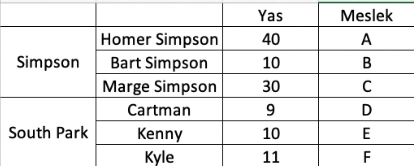

* Görüldüğü gibi iki adet indeks var bu dıştaki indeks çizgi filmin adını belirtirken içteki indeks ise adı geçen çizgi filmin karakter isimlerini belirtir Bunu ise iki farklı liste şeklinde yazarak birleştirebiliriz.

In [93]:
ilkIndeksler = ["Simpson","Simpson","Simpson","South Park","South Park","South Park"] # dıştaki indeks

In [94]:
icIndeksler = ["Homer Simpson","Bart Simpson","Marge Simpson","Cartman","Kenny","Kyle"] #içteki indeks

> Görüldüğü gibi indeksleri oluşturduk. Ama bunlar halen liste türünde olduğunu unutmamak gerek

* Şimdi ise bu indeksleri iç içe atmamız gerekir. Bu indeksleri birleştirmek listede bulunan zip methodu kullanırız.

In [95]:
birlesmisIndeks = list(zip(ilkIndeksler,icIndeksler)) # zip methodu birleştirme methodudur.

In [99]:
birlesmisIndeks # liste türünde oluşturdu...

[('Simpson', 'Homer Simpson'),
 ('Simpson', 'Bart Simpson'),
 ('Simpson', 'Marge Simpson'),
 ('South Park', 'Cartman'),
 ('South Park', 'Kenny'),
 ('South Park', 'Kyle')]

In [100]:
birlesmisIndeks = pd.MultiIndex.from_tuples(birlesmisIndeks)  # multiIndex kullanarak bunu multiIndex'e dönüştürdüm

In [101]:
birlesmisIndeks # pandas multi Index

MultiIndex([(   'Simpson', 'Homer Simpson'),
            (   'Simpson',  'Bart Simpson'),
            (   'Simpson', 'Marge Simpson'),
            ('South Park',       'Cartman'),
            ('South Park',         'Kenny'),
            ('South Park',          'Kyle')],
           )

In [83]:
type(birlesmisIndeks)

pandas.core.indexes.multi.MultiIndex

In [102]:
cizgiFilmListesi = [[40,"A"],[10,"B"],[30,"C"],[9,"D"],[10,"E"],[11,"F"]] # veri girişi gerçekleştirdim

In [107]:
cizgiFilmListesi # liste halinde veri girişi gerçekleştirdim ve görüntüledim

[[40, 'A'], [10, 'B'], [30, 'C'], [9, 'D'], [10, 'E'], [11, 'F']]

In [108]:
cizgiFilmListesiDizisi = np.array(cizgiFilmListesi) # numpy dizisi haline dönüştürdüm

In [109]:
cizgiFilmDataFrame = pd.DataFrame(cizgiFilmListesiDizisi, index = birlesmisIndeks, columns = ["Yaş","Meslek"]) # data, indeks, colums değerleri

In [88]:
cizgiFilmDataFrame 

Yaş Meslek
Simpson    Homer Simspon  40      A
           Bart Simpson   10      B
           Marge Simpson  30      C
South Park Cartman         9      D
           Kenny          10      E
           Kyle           11      F

In [110]:
cizgiFilmDataFrame.loc["Simpson"] # simpsonları seç

,Yaş,Meslek
Homer Simpson,40,A
Bart Simpson,10,B
Marge Simpson,30,C


In [111]:
cizgiFilmDataFrame.loc["Simpson"].loc["Bart Simpson"] # Simpsonlar içerisinden Bart Simpsonu görüntüle

Yaş       10
Meslek     B
Name: Bart Simpson, dtype: object

In [112]:
cizgiFilmDataFrame.index.names = ["Film Adı", "İsim"] # indexlerin isimlerini bu şekilde değiştirebiliriz

In [113]:
cizgiFilmDataFrame

Yaş Meslek
Film Adı   İsim                    
Simpson    Homer Simpson  40      A
           Bart Simpson   10      B
           Marge Simpson  30      C
South Park Cartman         9      D
           Kenny          10      E
           Kyle           11      F